In [1]:
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import plotly.express as px
plt.style.use('ggplot')   
%matplotlib inline

In [2]:
pl_pool=pd.read_csv('plr_pool.csv', parse_dates = ['last_visit'])


In [3]:
pl_pool.describe()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
count,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,556.920000,207.250000,2024-12-28 05:16:48,-12008.038907,334.982590,-54.119527,38110.580000,22.469036,181.300407,7.918573e+05,552.231672,3552.049776
min,106.000000,56.000000,2024-11-09 00:00:00,-53014.826306,85.953269,-242.510823,2319.000000,2.177524,18.701613,3.651422e+04,100.920130,629.994204
25%,295.500000,132.000000,2024-12-27 00:00:00,-21515.704901,101.513947,-106.610577,13138.750000,12.013030,69.977099,1.502177e+05,121.089432,703.312044
50%,596.000000,218.500000,2024-12-29 12:00:00,-5650.375828,227.126630,-29.779108,22411.000000,14.712284,97.758769,4.742608e+05,392.381816,3426.565825
75%,794.500000,274.500000,2024-12-31 00:00:00,-2245.301188,430.296115,-13.893007,45354.500000,37.335115,387.419993,9.415160e+05,478.914441,3999.938896
max,991.000000,611.000000,2025-01-01 00:00:00,24037.902233,1609.009088,193.854050,120041.000000,43.372804,434.021898,4.551509e+06,3268.955120,15914.366238
std,273.338015,90.948579,NaN,13981.328192,382.249692,60.941452,35367.481491,12.749470,146.240168,1.035453e+06,823.697106,3959.335637


In [4]:
pl_pool.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,257,247,2025-01-01,-1329.763422,109.278631,-5.383658,16759.0,11.107764,67.850202,172580.579106,114.385365,698.706798
1,769,132,2024-12-30,-13325.012437,214.352050,-100.947064,52565.0,42.237481,398.219697,534749.160789,429.686241,4051.130006
2,259,102,2024-11-09,-2502.578222,88.030196,-24.535081,7239.0,14.806898,70.970588,74096.399483,151.559309,726.435289
3,260,56,2024-12-30,-375.935803,88.739098,-6.713139,3590.0,11.390282,64.107143,36514.223509,115.851615,652.039706
4,776,281,2024-12-31,-2760.199586,102.687727,-9.822774,18936.0,11.724100,67.387900,193739.694416,119.952657,689.465105


In [5]:
px.scatter_3d(
    pl_pool,
    x='visits',
    y='res_sum',
    z='bets_mean',
    color='res_std'
).show(renderer='browser')

In [6]:
end_date = datetime.strptime("01/1/2025", "%d/%m/%Y")

In [7]:
type(end_date)

datetime.datetime

In [8]:
pl_pool['Recency'] = (end_date-pl_pool.last_visit).dt.days

In [9]:
pl_pool['Recency']

0      0
1      2
2     53
3      2
4      1
      ..
95     0
96     0
97     4
98     0
99     2
Name: Recency, Length: 100, dtype: int64

In [10]:
px.scatter_3d(
    pl_pool,
    x='visits',
    y='res_sum',
    z='Recency',
    color='res_std'
).show(renderer='browser')

In [11]:
# rfm_df = pl_pool[['Recency','visits','res_sum']]
rfm_df = pl_pool[['Recency','visits','bets_sum']]
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

In [12]:
rfm_df

,Recency,Frequency,Monetary
0,0,247,1.725806e+05
1,2,132,5.347492e+05
2,53,102,7.409640e+04
3,2,56,3.651422e+04
4,1,281,1.937397e+05
...,...,...,...
95,0,250,7.867784e+05
96,0,189,6.650188e+05
97,4,203,3.025528e+06
98,0,286,4.551509e+06


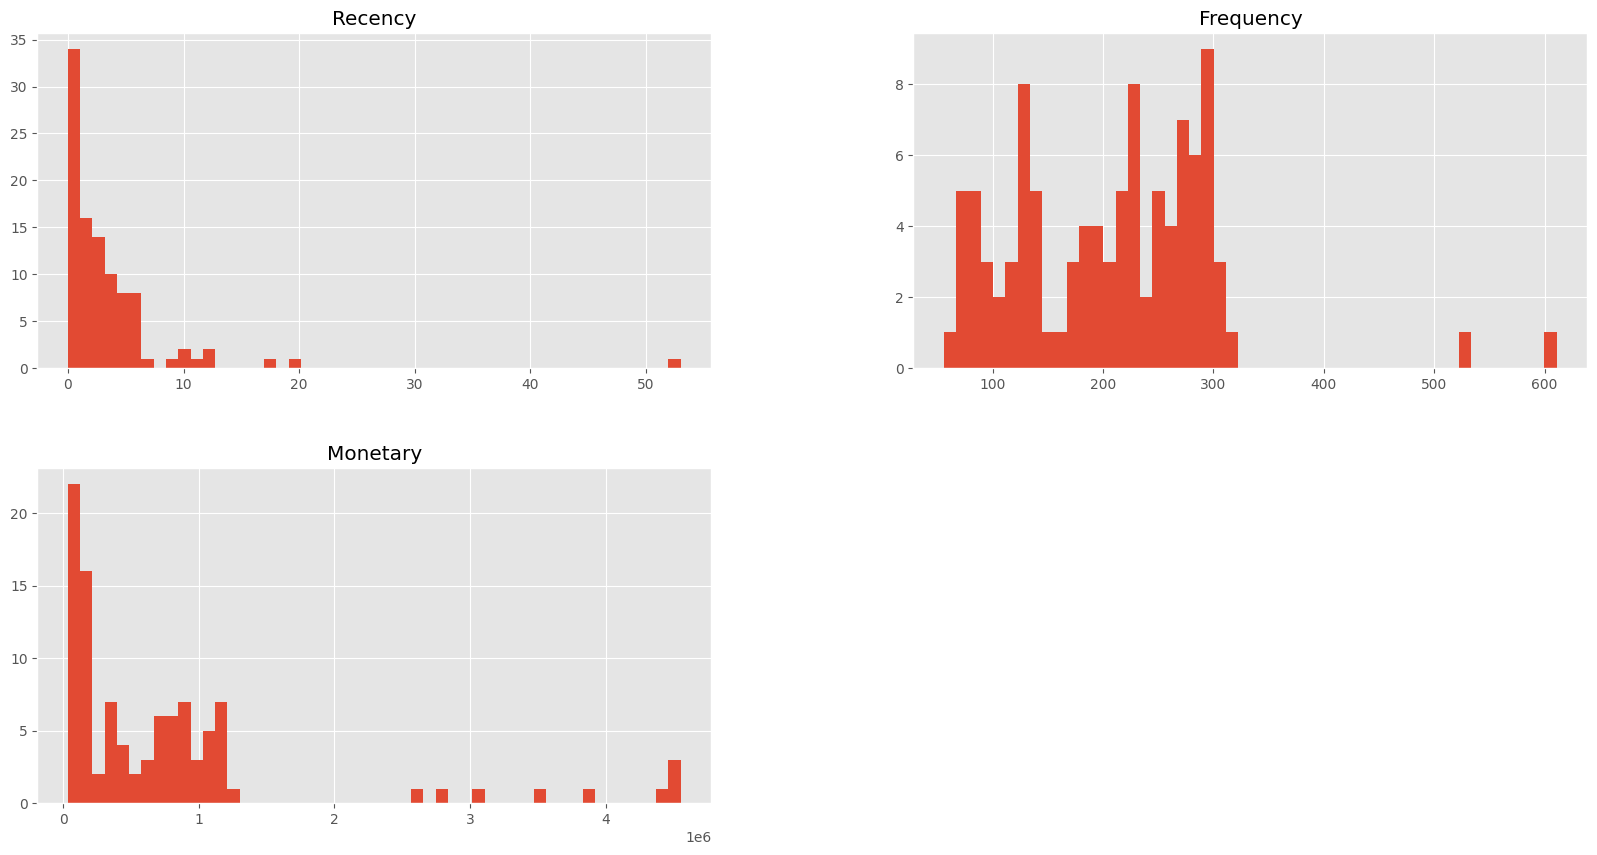

In [13]:
rfm_df[['Recency', 'Frequency', 'Monetary']].hist(figsize=(20,10), bins=50);

In [14]:
# (rfm[['Recency', 'Frequency', 'Monetary']]
#     .apply(lambda w: np.log(w + 1))
#     .hist(figsize=(12,6), bins=30))

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# rfm_df['r_categores'] = pd.qcut(rfm_df['Recency'], q=3, duplicates='drop')

In [17]:
rfm_df['r_categores'] = pd.qcut(rfm_df['Recency'], q=3, labels=['1', '2', '3'])
rfm_df['f_categores'] = pd.qcut(rfm_df['Frequency'], q=3, labels=['3', '2', '1'])
rfm_df['m_categores'] = pd.qcut(rfm_df['Monetary'], q=3, labels=['1', '2', '3'])



In [18]:
rfm_df

,Recency,Frequency,Monetary,r_categores,f_categores,m_categores
0,0,247,1.725806e+05,1,2,1
1,2,132,5.347492e+05,2,3,2
2,53,102,7.409640e+04,3,3,1
3,2,56,3.651422e+04,2,3,1
4,1,281,1.937397e+05,1,1,1
...,...,...,...,...,...,...
95,0,250,7.867784e+05,1,1,2
96,0,189,6.650188e+05,1,2,2
97,4,203,3.025528e+06,2,2,3
98,0,286,4.551509e+06,1,1,3


In [19]:
rfm_df

,Recency,Frequency,Monetary,r_categores,f_categores,m_categores
0,0,247,1.725806e+05,1,2,1
1,2,132,5.347492e+05,2,3,2
2,53,102,7.409640e+04,3,3,1
3,2,56,3.651422e+04,2,3,1
4,1,281,1.937397e+05,1,1,1
...,...,...,...,...,...,...
95,0,250,7.867784e+05,1,1,2
96,0,189,6.650188e+05,1,2,2
97,4,203,3.025528e+06,2,2,3
98,0,286,4.551509e+06,1,1,3


In [20]:
rfm_df['RFM_RES'] = rfm_df['r_categores'].astype(str) +rfm_df['f_categores'].astype(str) +rfm_df['m_categores'].astype(str) 

In [21]:
rfm_df

,Recency,Frequency,Monetary,r_categores,f_categores,m_categores,RFM_RES
0,0,247,1.725806e+05,1,2,1,121
1,2,132,5.347492e+05,2,3,2,232
2,53,102,7.409640e+04,3,3,1,331
3,2,56,3.651422e+04,2,3,1,231
4,1,281,1.937397e+05,1,1,1,111
...,...,...,...,...,...,...,...
95,0,250,7.867784e+05,1,1,2,112
96,0,189,6.650188e+05,1,2,2,122
97,4,203,3.025528e+06,2,2,3,223
98,0,286,4.551509e+06,1,1,3,113


In [22]:
px.scatter_3d(
    rfm_df,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='RFM_RES'
).show(renderer='browser')

In [23]:
rfm_df[['Recency', 'Frequency', 'Monetary'] ] = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log(x+1))

In [24]:
px.scatter_3d(
    rfm_df,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='RFM_RES'
).show(renderer='browser')

In [25]:
rfm_df['r_categores'] = pd.qcut(rfm_df['Recency'], q=3, labels=['1', '2', '3'])
rfm_df['f_categores'] = pd.qcut(rfm_df['Frequency'], q=3, labels=['3', '2', '1'])
rfm_df['m_categores'] = pd.qcut(rfm_df['Monetary'], q=3, labels=['1', '2', '3'])

In [26]:
rfm_df['RFM_RES'] = rfm_df['r_categores'].astype(str) +rfm_df['f_categores'].astype(str) +rfm_df['m_categores'].astype(str) 

In [27]:
px.scatter_3d(
    rfm_df,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='RFM_RES'
).show(renderer='browser')

In [28]:
pl_pool.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,Recency
0,257,247,2025-01-01,-1329.763422,109.278631,-5.383658,16759.0,11.107764,67.850202,172580.579106,114.385365,698.706798,0
1,769,132,2024-12-30,-13325.012437,214.352050,-100.947064,52565.0,42.237481,398.219697,534749.160789,429.686241,4051.130006,2
2,259,102,2024-11-09,-2502.578222,88.030196,-24.535081,7239.0,14.806898,70.970588,74096.399483,151.559309,726.435289,53
3,260,56,2024-12-30,-375.935803,88.739098,-6.713139,3590.0,11.390282,64.107143,36514.223509,115.851615,652.039706,2
4,776,281,2024-12-31,-2760.199586,102.687727,-9.822774,18936.0,11.724100,67.387900,193739.694416,119.952657,689.465105,1


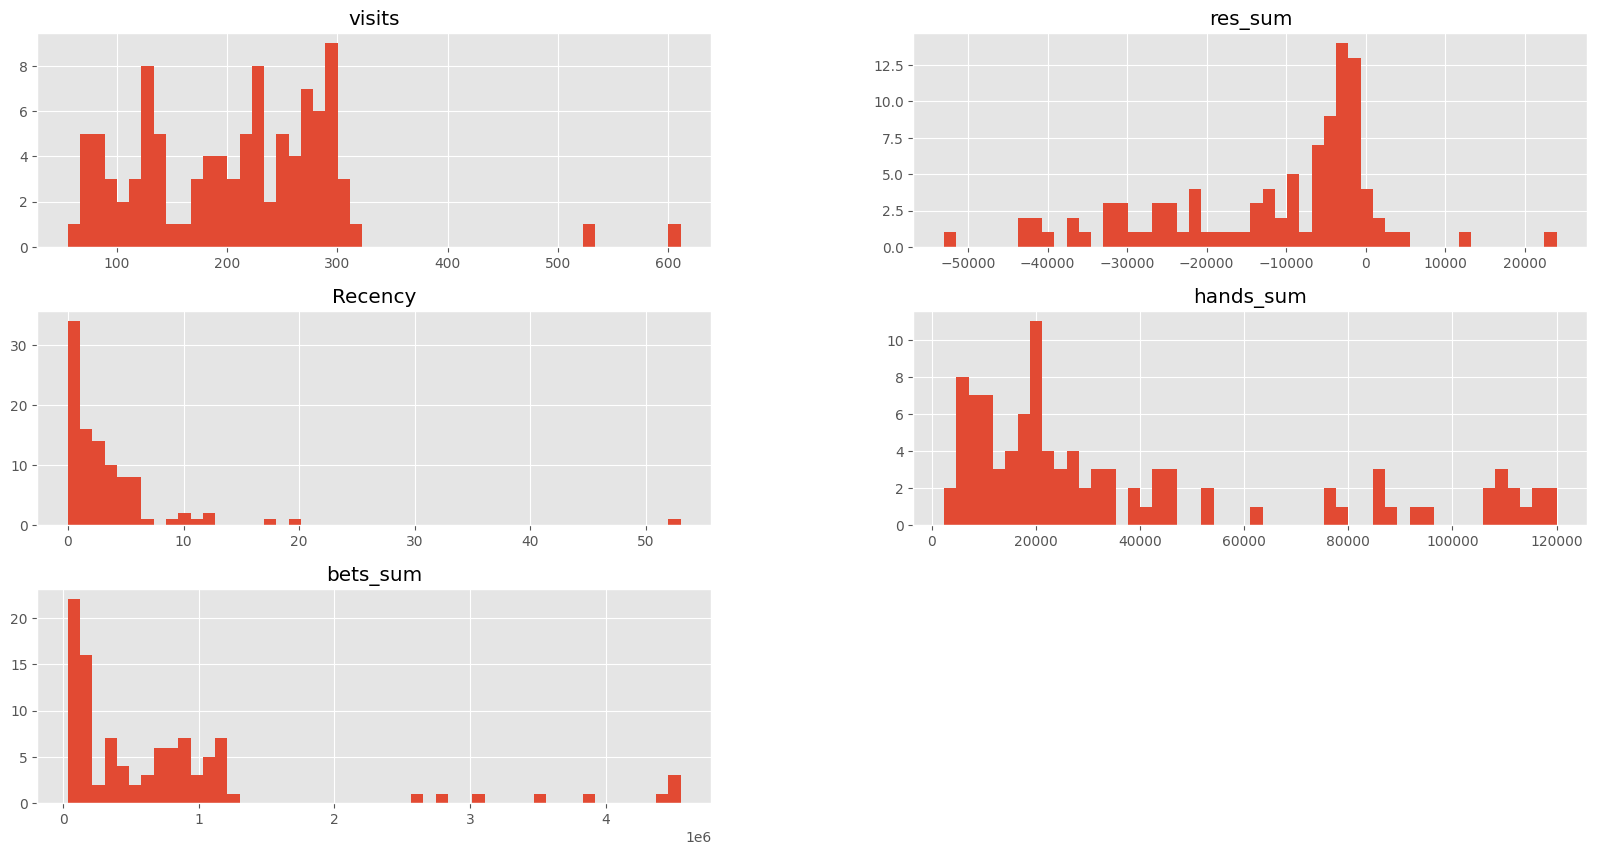

In [29]:
pl_pool[['visits','res_sum','Recency','hands_sum','bets_sum' ]].hist(figsize=(20,10),bins = 50);

In [30]:
pl_pool[['visits','Recency','hands_sum','bets_sum' ]] = pl_pool[['visits','Recency','hands_sum','bets_sum' ]].apply(lambda x:np.log(x+1) )

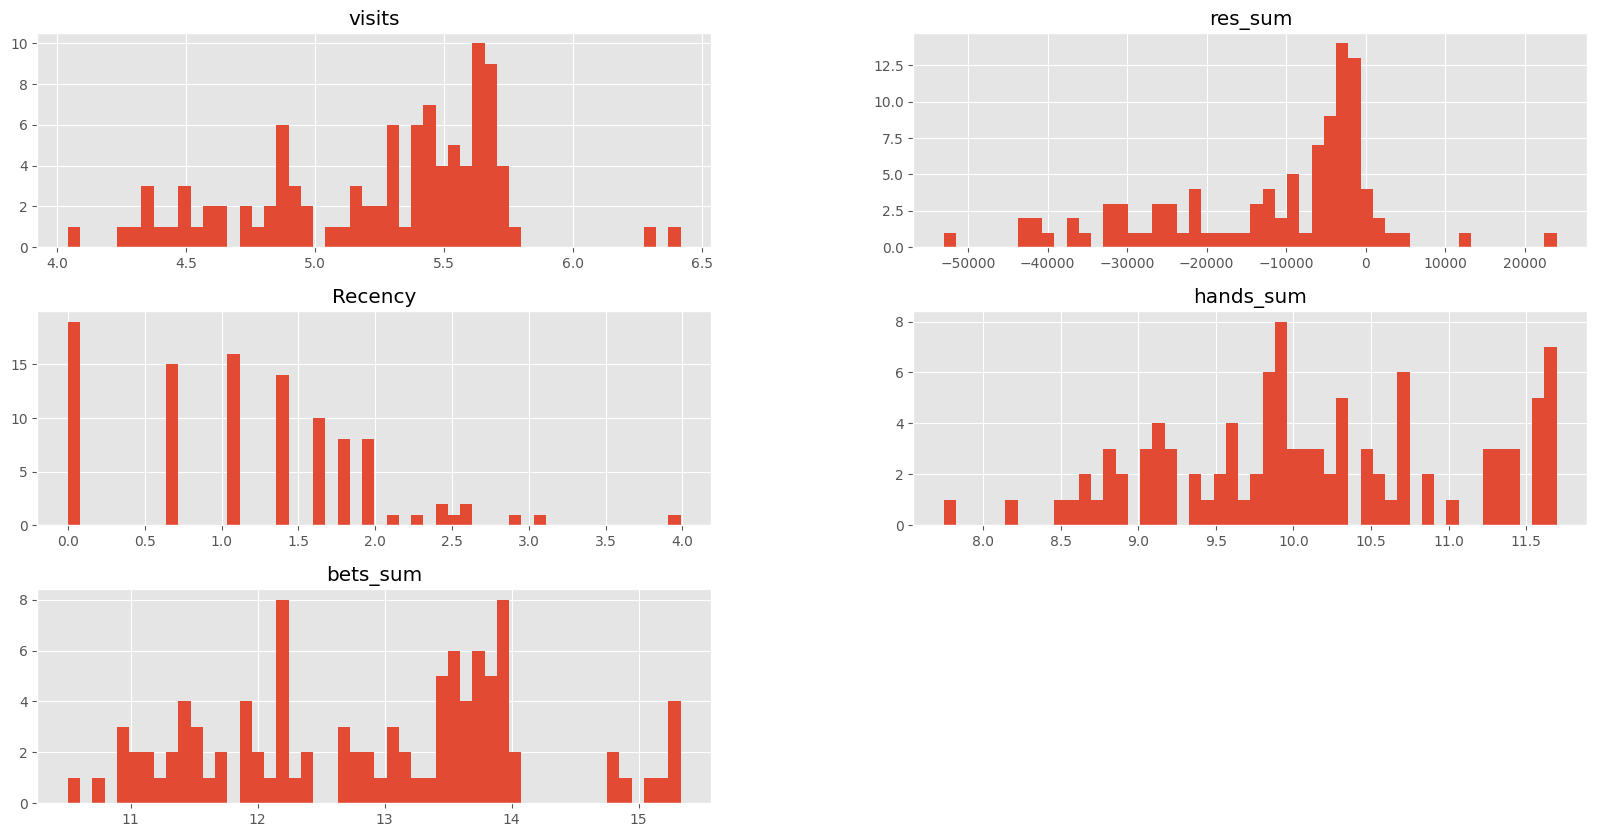

In [31]:
pl_pool[['visits','res_sum','Recency','hands_sum' ,'bets_sum' ]].hist(figsize=(20,10),bins = 50);

In [32]:
def min_max_scaler(serias):
    return (serias- serias.min())/(serias.max()-serias.min()) 

In [33]:
pl_pool[['visits','Recency','hands_sum' ,'bets_sum' ]] = min_max_scaler(pl_pool[['visits','Recency','hands_sum' ,'bets_sum' ]])

In [34]:
def norm_scaler(serias):
    return (serias- serias.mean())/serias.std() 

In [35]:
pl_pool['res_sum'] = norm_scaler(pl_pool['res_sum'])

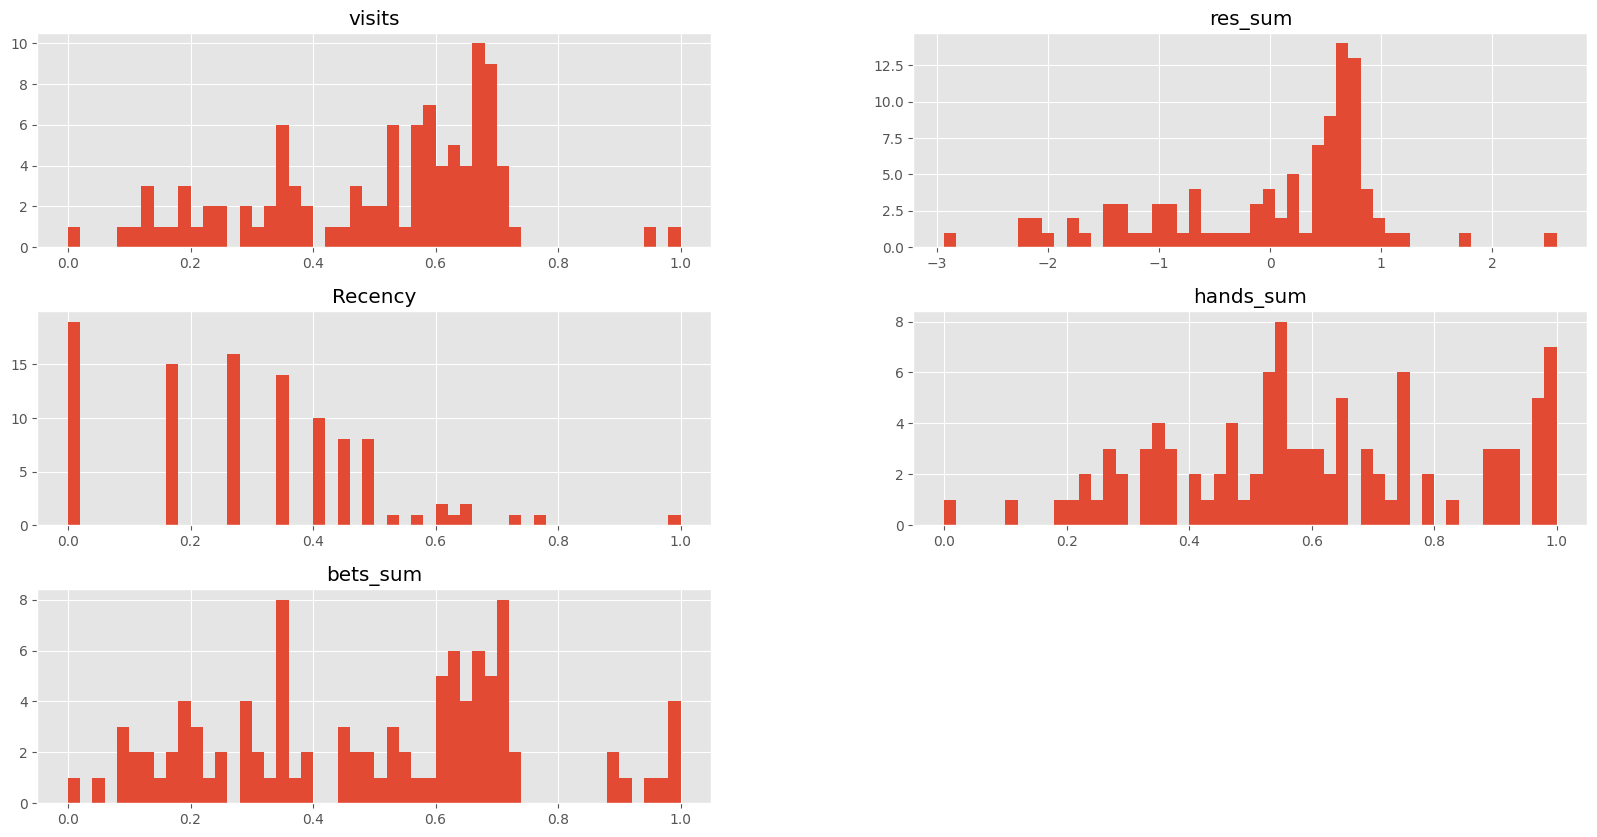

In [36]:
pl_pool[['visits','res_sum','Recency','hands_sum' ,'bets_sum' ]].hist(figsize=(20,10),bins = 50);


In [37]:
px.scatter_3d(
    pl_pool,
    x='visits',
    y='bets_sum',
    z='Recency',
    color='res_sum'
).show(renderer='browser')

In [38]:
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler


In [39]:
# Assuming 'df' is your prepared Pandas DataFrame
# Select the columns to use for clustering
X = pl_pool[['visits', 'bets_sum', 'Recency']] 

# Scale the data (optional but recommended)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3) # Example with 3 clusters
kmeans.fit(X)
pl_pool['cluster'] = kmeans.labels_
cluster_centers_scaled = kmeans.cluster_centers_

In [40]:
cluster_centers_scaled


array([[0.5985787 , 0.45826663, 0.1199471 ],
       [0.59747634, 0.72822732, 0.31982377],
       [0.28386562, 0.23951671, 0.46384224]])

In [41]:
pl_pool


,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,Recency,cluster
0,257,0.619450,2025-01-01,0.763753,109.278631,-5.383658,0.501087,11.107764,67.850202,0.321862,114.385365,698.706798,0.000000,0
1,769,0.356955,2024-12-30,-0.094195,214.352050,-100.947064,0.790746,42.237481,398.219697,0.556228,429.686241,4051.130006,0.275412,1
2,259,0.249266,2024-11-09,0.679868,88.030196,-24.535081,0.288387,14.806898,70.970588,0.146649,151.559309,726.435289,1.000000,2
3,260,0.000000,2024-12-30,0.831974,88.739098,-6.713139,0.110703,11.390282,64.107143,0.000000,115.851615,652.039706,0.275412,2
4,776,0.673577,2024-12-31,0.661442,102.687727,-9.822774,0.532034,11.724100,67.387900,0.345829,119.952657,689.465105,0.173765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,748,0.624516,2025-01-01,-0.117523,405.162746,-54.604686,0.596761,14.830747,97.788000,0.636251,477.298304,3147.113668,0.000000,0
96,750,0.507218,2025-01-01,0.634415,476.077440,-16.603596,0.526076,13.165295,97.862434,0.601408,473.354736,3518.618213,0.000000,0
97,239,0.537169,2024-12-28,-0.623167,1381.728190,-102.072649,0.652142,32.815371,149.847291,0.915372,3263.875259,14904.078287,0.403471,1
98,240,0.680981,2025-01-01,-2.932968,1541.011474,-185.366526,0.751737,31.625215,157.569930,1.000000,3194.107199,15914.366238,0.000000,1


In [42]:
px.scatter_3d(
    pl_pool,
    x='visits',
    y='bets_sum',
    z='Recency',
    color='cluster'
).show(renderer='browser')

In [43]:
X


,visits,bets_sum,Recency
0,0.619450,0.321862,0.000000
1,0.356955,0.556228,0.275412
2,0.249266,0.146649,1.000000
3,0.000000,0.000000,0.275412
4,0.673577,0.345829,0.173765
...,...,...,...
95,0.624516,0.636251,0.000000
96,0.507218,0.601408,0.000000
97,0.537169,0.915372,0.403471
98,0.680981,1.000000,0.000000


In [44]:
from sklearn.cluster import DBSCAN

In [45]:
dbscan = DBSCAN(eps=0.2, min_samples=7)
clusters = dbscan.fit_predict(X)
pl_pool['DBCluster'] = clusters

In [46]:
px.scatter_3d(
    pl_pool,
    x='visits',
    y='bets_sum',
    z='Recency',
    color='DBCluster'
).show(renderer='browser')

In [47]:
pl_pool



,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,Recency,cluster,DBCluster
0,257,0.619450,2025-01-01,0.763753,109.278631,-5.383658,0.501087,11.107764,67.850202,0.321862,114.385365,698.706798,0.000000,0,0
1,769,0.356955,2024-12-30,-0.094195,214.352050,-100.947064,0.790746,42.237481,398.219697,0.556228,429.686241,4051.130006,0.275412,1,1
2,259,0.249266,2024-11-09,0.679868,88.030196,-24.535081,0.288387,14.806898,70.970588,0.146649,151.559309,726.435289,1.000000,2,-1
3,260,0.000000,2024-12-30,0.831974,88.739098,-6.713139,0.110703,11.390282,64.107143,0.000000,115.851615,652.039706,0.275412,2,0
4,776,0.673577,2024-12-31,0.661442,102.687727,-9.822774,0.532034,11.724100,67.387900,0.345829,119.952657,689.465105,0.173765,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,748,0.624516,2025-01-01,-0.117523,405.162746,-54.604686,0.596761,14.830747,97.788000,0.636251,477.298304,3147.113668,0.000000,0,1
96,750,0.507218,2025-01-01,0.634415,476.077440,-16.603596,0.526076,13.165295,97.862434,0.601408,473.354736,3518.618213,0.000000,0,1
97,239,0.537169,2024-12-28,-0.623167,1381.728190,-102.072649,0.652142,32.815371,149.847291,0.915372,3263.875259,14904.078287,0.403471,1,2
98,240,0.680981,2025-01-01,-2.932968,1541.011474,-185.366526,0.751737,31.625215,157.569930,1.000000,3194.107199,15914.366238,0.000000,1,-1
